### Problem Statement 1:
Is gender independent of education level? A random sample of 395 people were
surveyed and each person was asked to report the highest education level they
obtained. The data that resulted from the survey is summarized in the following table:
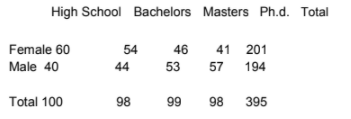
Question: Are gender and education level dependent at 5% level of significance? In
other words, given the data collected above, is there a relationship between the
gender of an individual and the level of education that they have obtained?

H0: Gender and education independent

H1: Gender and education dependent

Degree of Freedom = (2-1)(4-1) = 3

In [1]:
import pandas as pd
observed = pd.DataFrame(data = [[60,54,46,41],[40,44,53,57]], columns=["High School","Bachelors","Masters","Ph.d"], index=["Male", "Female"])
observed.loc['Total',:]= observed.sum(axis=0)
observed.loc[:,'Total'] = observed.sum(axis=1)
observed

,High School,Bachelors,Masters,Ph.d,Total
Male,60.0,54.0,46.0,41.0,201.0
Female,40.0,44.0,53.0,57.0,194.0
Total,100.0,98.0,99.0,98.0,395.0


In [47]:
# Calculating our expected table
expected = pd.DataFrame(data = [[0,0,0,0],[0,0,0,0]], columns=["High School","Bachelors","Masters","Ph.d"], index=["Male", "Female"])
expected.iloc[0,0] = (observed.iloc[2,0]*observed.iloc[0,4])/observed.iloc[2,4]
expected.iloc[0,1] = (observed.iloc[2,1]*observed.iloc[0,4])/observed.iloc[2,4]
expected.iloc[0,2] = (observed.iloc[2,2]*observed.iloc[0,4])/observed.iloc[2,4]
expected.iloc[0,3] = (observed.iloc[2,3]*observed.iloc[0,4])/observed.iloc[2,4]
expected.iloc[1,0] = (observed.iloc[2,0]*observed.iloc[1,4])/observed.iloc[2,4]
expected.iloc[1,1] = (observed.iloc[2,1]*observed.iloc[1,4])/observed.iloc[2,4]
expected.iloc[1,2] = (observed.iloc[2,2]*observed.iloc[1,4])/observed.iloc[2,4]
expected.iloc[1,3] = (observed.iloc[2,3]*observed.iloc[1,4])/observed.iloc[2,4]

expected.loc['Total',:]= expected.sum(axis=0)
expected.loc[:,'Total'] = expected.sum(axis=1)
expected

,High School,Bachelors,Masters,Ph.d,Total
Male,50.886076,49.868354,50.377215,49.868354,201.0
Female,49.113924,48.131646,48.622785,48.131646,194.0
Total,100.000000,98.000000,99.000000,98.000000,395.0


In [48]:
Chi_Squared = ((observed - expected)**2/expected).sum().sum()
Chi_Squared

8.006066246262538

The critical value at df = 3 and significance level of 5% is 7.815. Since our computed value is greater than the critical value the null hypothesis is rejected. Gender and Education are dependent.

### Problem Statement 2:
Using the following data, perform a oneway analysis of variance using α=.05. Write
up the results in APA format.

[Group1: 51, 45, 33, 45, 67]

[Group2: 23, 43, 23, 43, 45]

[Group3: 56, 76, 74, 87, 56]

H0: μ1 = μ2 = μ3

H1: μ1 ≠ μ2 ≠ μ3

α = 0.05

In [ ]:
# Between
SSbetween = (sum(df.groupby('group').sum()['weight']**2)/n) \
    - (df['weight'].sum()**2)/N

# Within
#sum_y_squared = sum([value**2 for value in df['weight'].values])
SSwithin = sum_y_squared - sum(df.groupby('group').sum()['weight']**2)/n

# Total
SStotal = sum_y_squared - (df['weight'].sum()**2)/N


In [61]:
Group1 = [51, 45, 33, 45, 67]
Group2 = [23, 43, 23, 43, 45]
Group3 = [56, 76, 74, 87, 56]

# Number of elements in each group
n1 = len(Group1)
n2 = len(Group2)
n3 = len(Group3)

# Total number of elements in all groups
n = n1 + n2 + n3

# Mean of each group
mean1 = sum(Group1)/n1
mean2 = sum(Group2)/n2
mean3 = sum(Group3)/n3

# Mean of all groups (Average Mean can only be taken if sample size of all groups are the same)
mean = (mean1 + mean2 + mean3) / 3

# Number of groups
k = 3

In [70]:
# Sum of squared errors
se1 = sum([(x-mean1)**2 for x in Group1])
se2 = sum([(x-mean2)**2 for x in Group2])
se3 = sum([(x-mean3)**2 for x in Group3])

In [74]:
# Sum of Squares within
MSSw = (se1+se2+se3)/(n-k)
MSSw

155.06666666666666

In [76]:
# Sum of Squares between
MSSb = ( (((mean1-mean)**2)*n1) + (((mean2-mean)**2)*n2) + (((mean3-mean)**2)*n3) ) / (k-1)
MSSb

1511.4666666666665

In [78]:
F = MSSb/MSSw
F

9.747205503009457

Degrees of Freedom between = k - 1 = 2

Degrees of Freedom within = n - k = 12

F critical value = 3.8853

Since my F statistic is greater than my critical value, therefore H0 is rejected.

### Problem Statement 3:
Calculate F Test for given 10, 20, 30, 40, 50 and 5,10,15, 20, 25.

In [82]:
import numpy as np

given1 = np.array([10, 20, 30, 40, 50])
given2 = np.array([5, 10, 15, 20, 25])

In [91]:
var1 = given1.var()
var2 = given2.var()
f = var1/var2
f

4.0